# SUMMER ANALYTICS 2024



# Week-1 Assignment

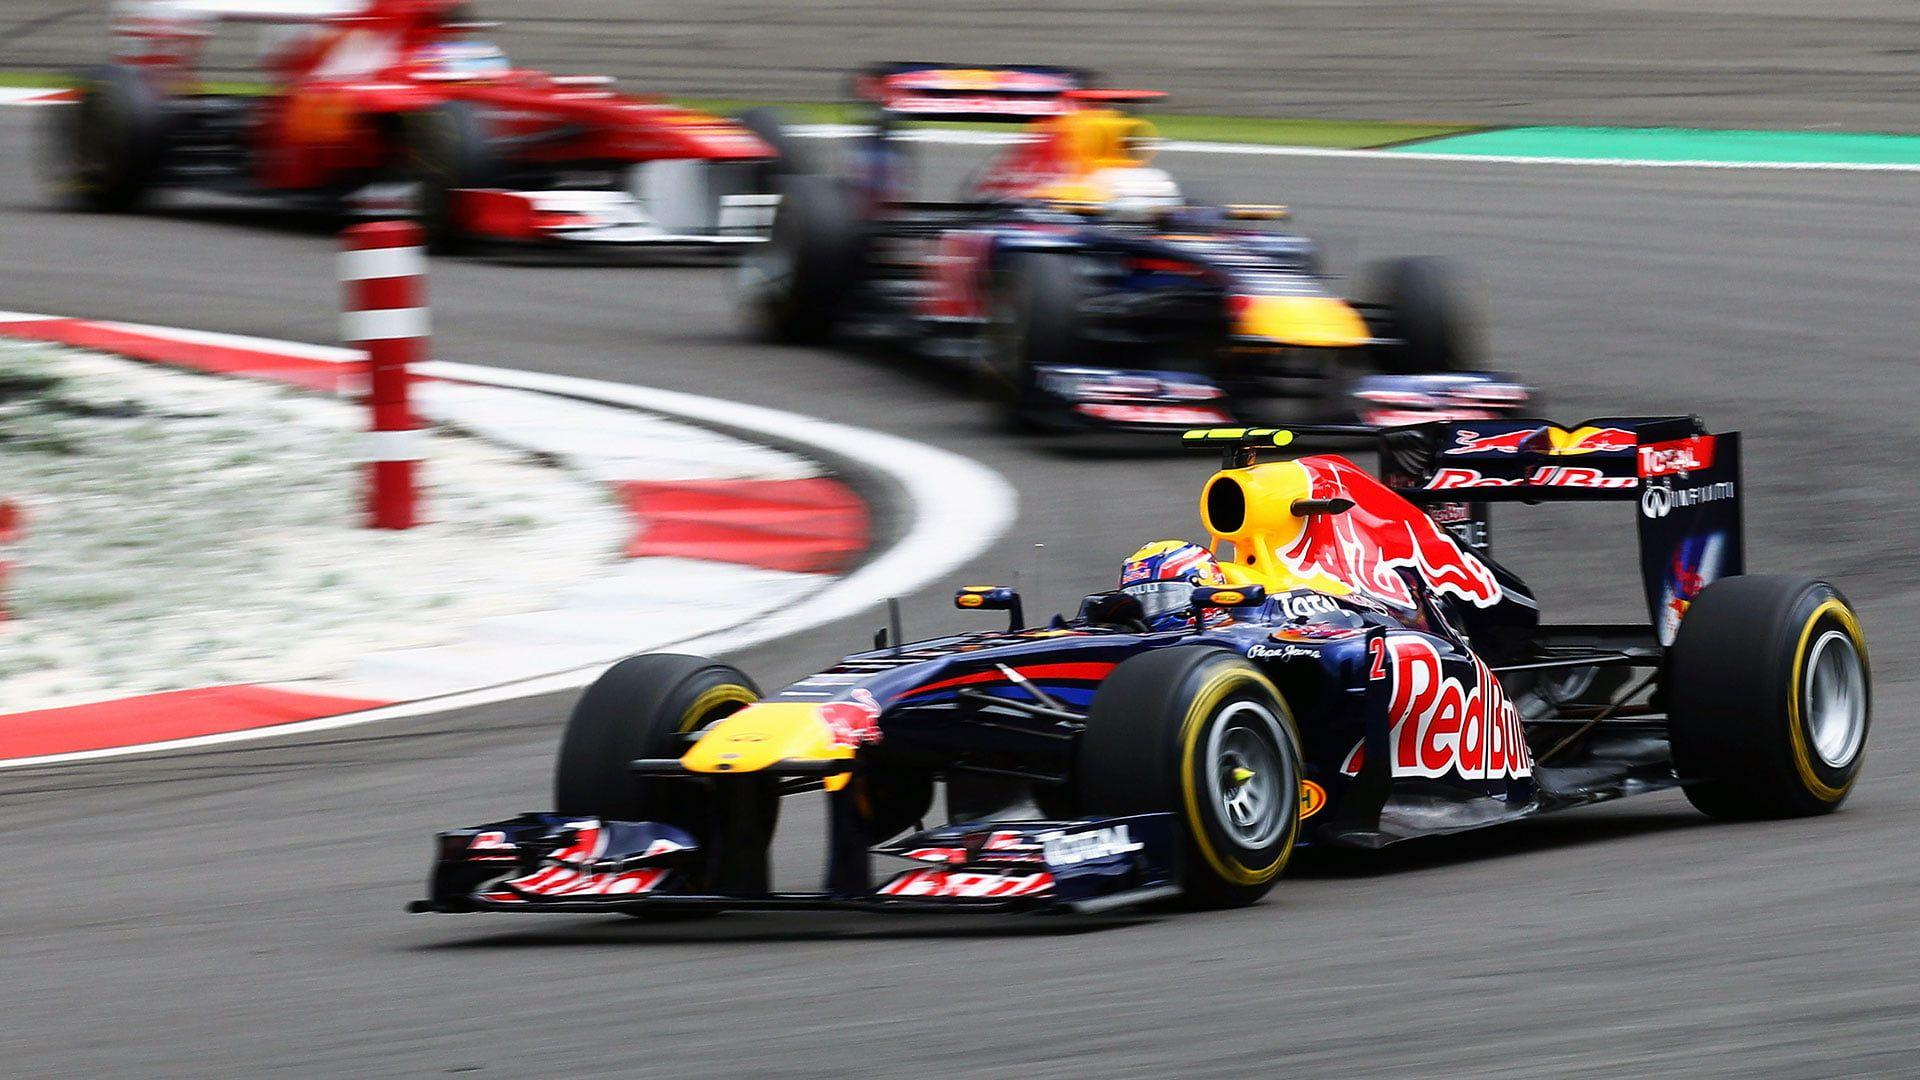

# **Data Grand Prix!**



**Welcome to your first assignment of Summer Analytics 2025! We hope you are excited to implement and test everything you have learnt up until now. The dataset which you'll use includes information about cars.**

**We've got an interesting set of questions for you to get a basic understanding of pandas and data visualization libraries. GOOD LUCK!**


***Let's get started with importing numpy, pandas, seaborn and matplotlib!***

Note - matplotlib should be imported with the command :

 `import matplotlib.pyplot as plt`

image.avif

**So lets get started!! Buckle up your belts for this exciting ride!!**

### 1) Start by importing all important libraries
For eg, "import numpy as np"

In [1]:
#your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### 2) Read the csv file and assign it to a variable .

In [2]:
#your code here
df = pd.read_csv('cars.csv')

### 3) Display shape of dataframe
Expected Output - (398, 9)

In [3]:
#your code here
print(df.shape)

(398, 9)


### 4) Print all columns of dataframe
Return an array containing names of all the columns.

In [4]:
#your code here
print(df.columns.values)

['mpg' 'cylinders' 'displacement' 'horsepower' 'weight' 'acceleration'
 'model_year' 'origin' 'name']


### 6) Set the 'name' column as the index of dataframe

In [5]:
#your code here
df.set_index('name', inplace=True)

###  7) Print a list of all the unique mpg values





In [6]:
#your code here
unique_mpg = df['mpg'].unique()
print(unique_mpg)

[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]


### 8) Create a column which contains the horsepower divided by weightas its metric and make this new column the index.

In [7]:
#your code here
df['hp_per_weight'] = df['horsepower'] / df['weight']
df.set_index('hp_per_weight', inplace=True)

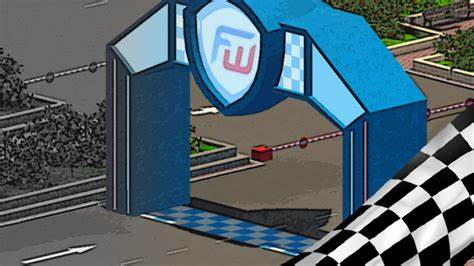

 **Checkpoint!!
Congratulations on making it this far. You are really keeping up in Data Grand Prix.
Now starts the real race i.e. graded questions of the quiz.**

## GRADED Questions (To be answered in the quiz)
### Try to retrieve some information from the data and answer the questions below . BEST OF LUCK !!

### 1. What is name of car that has the highest horsepower?  

In [17]:
#your code here
# To get the car name, we need to find the corresponding name in the original dataframe before index was changed
# Reading the original CSV to get the 'name' column
original_df = pd.read_csv('cars.csv')
row = original_df[original_df['horsepower'] == max_hp]
car_name = row.iloc[0]['name']
print(car_name)

pontiac grand prix


### 2. How many cars have mpg ≥ 35?

In [18]:
#your code here
num_cars_mpg_35_or_more = (df['mpg'] >= 35).sum()
print(num_cars_mpg_35_or_more)

36


### 3. What is the most common origin for cars with horsepower > 100 and weight < 3000?

In [19]:
#your code here
filtered = df[(df['horsepower'] > 100) & (df['weight'] < 3000)]
most_common_origin = filtered['origin'].mode()[0]
print(most_common_origin)

usa


### 4. What is the mean acceleration of cars from Japan? (rounded to 2 decimals)

In [20]:
#your code here
mean_acc_japan = round(df[df['origin'] == 'japan']['acceleration'].mean(), 2)
print(mean_acc_japan)

16.17


### 5. Which year had the highest average mpg?

In [21]:
#your code here
year_with_highest_avg_mpg = df.groupby('model_year')['mpg'].mean().idxmax()
print(year_with_highest_avg_mpg)

80



## *Congratulations on coming this far! Since we were having so much fun playing with this dataset, let's move towards finish line by attempting some Ungraded questions!*

### **Note:** These questions are UNGRADED, and are given as an extra exercise.

### Find the car (or cars) with the best ratio of horsepower to weight among all cars that also have above-median mpg.

In [38]:
#your code here
best_hp_per_weight = best_cars.index.values
original_df['hp_per_weight'] = original_df['horsepower'] / original_df['weight']
result = original_df[original_df['hp_per_weight'].isin(best_hp_per_weight)]

# Displaying the car name(s) and relevant info
result[['name', 'mpg', 'horsepower', 'weight', 'hp_per_weight']]

,name,mpg,horsepower,weight,hp_per_weight
23,bmw 2002,26.0,113.0,2234,0.050582


### Design a multi-line plot using Matplotlib or Seaborn that shows the evolution of average mpg over the years, separately for each origin

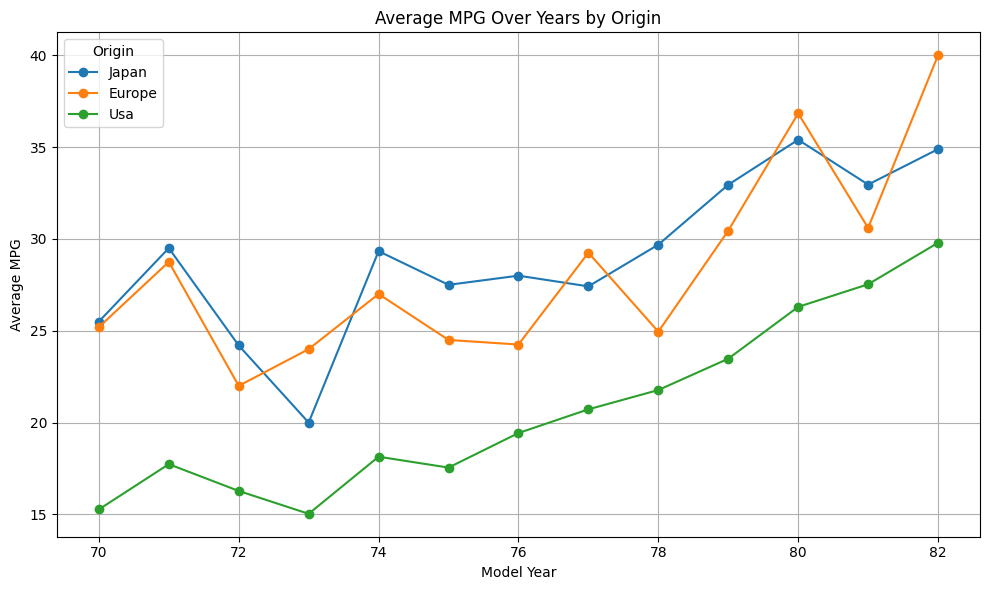

In [43]:
#your code here
# Grouping by model_year and origin, then calculate average mpg
avg_mpg_by_year_origin = df.groupby(['model_year', 'origin'])['mpg'].mean().reset_index()

# Pivoting for easier plotting
pivot_df = avg_mpg_by_year_origin.pivot(index='model_year', columns='origin', values='mpg')

# Plot using matplotlib
plt.figure(figsize=(10, 6))
for origin in ['japan', 'europe', 'usa']:
    if origin in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[origin], marker='o', label=origin.capitalize())

plt.title('Average MPG Over Years by Origin')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.legend(title='Origin')
plt.grid(True)
plt.tight_layout()
plt.show()

### Create a Seaborn scatterplot (or PairGrid) where:

X = horsepower

Y = weight

Color by: origin

Size by: mpg

Hue order = ['japan', 'europe', 'usa']

Add meaningful plot titles and axis titles.

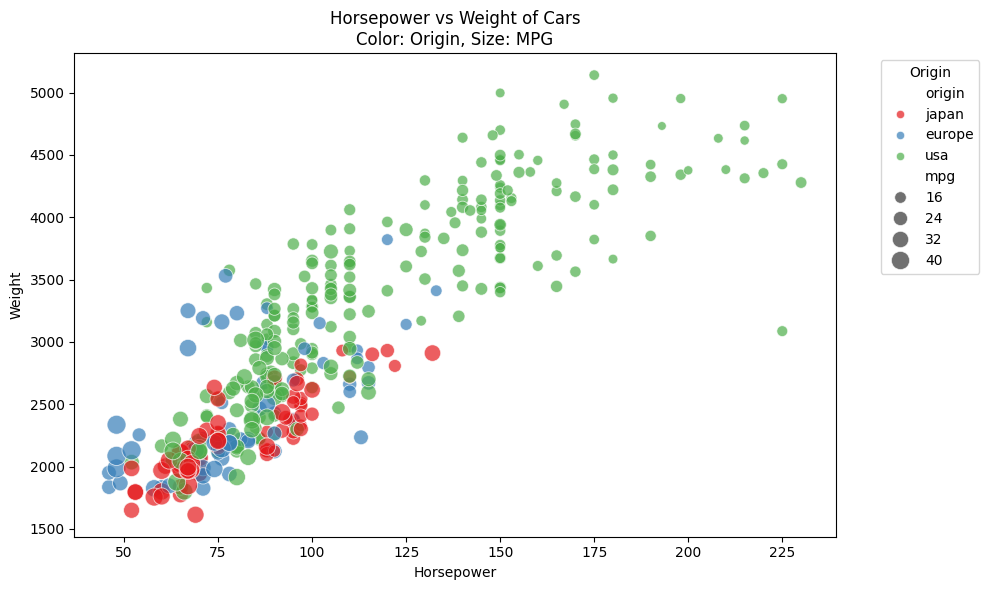

In [27]:
#your code here
# Reset index to get car names if needed
df_scatter = df.reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_scatter,
    x='horsepower',
    y='weight',
    hue='origin',
    size='mpg',
    hue_order=['japan', 'europe', 'usa'],
    sizes=(40, 200),
    alpha=0.7,
    palette='Set1'
)
plt.title('Horsepower vs Weight of Cars\nColor: Origin, Size: MPG')
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.legend(title='Origin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### We define a “consistent” car model as one that was produced over multiple years and had very low variation in mpg across those years (standard deviation < 1.0).

Tasks:

Identify car names that appear in more than one model_year.

For each such name, compute the standard deviation of mpg across years.

Return the car(s) with the lowest variation in mpg, among those with at least 2 appearances and std(mpg) < 1.0.

Report the model name(s), number of appearances, and the average mpg.

Bonus:
Sort the result by number of appearances (descending), then mpg (descending).

In [42]:
#your code here
# Finding car names that appear in more than one model_year
car_counts = original_df.groupby('name')['model_year'].nunique()
multi_year_cars = car_counts[car_counts > 1].index

# For these cars, compute std(mpg) across years
car_stats = (
    original_df[original_df['name'].isin(multi_year_cars)]
    .groupby('name')
    .agg(
        appearances=('model_year', 'nunique'),
        mpg_std=('mpg', 'std'),
        avg_mpg=('mpg', 'mean')
    )
)

# Filtering for std(mpg) < 1.0 and at least 2 appearances
consistent_cars = car_stats[(car_stats['mpg_std'] < 1.0) & (car_stats['appearances'] >= 2)]

# Sorting by appearances (desc), then avg_mpg (desc)
consistent_cars_sorted = consistent_cars.sort_values(['appearances', 'avg_mpg'], ascending=[False, False])

# Showing model name(s), number of appearances, and average mpg
consistent_cars_sorted[['appearances', 'avg_mpg']]

,appearances,avg_mpg
name,,
ford galaxie 500,3,14.333333
plymouth fury iii,3,14.333333
toyota corolla 1200,2,31.500000
mazda 626,2,31.450000
volkswagen rabbit,2,29.250000
datsun pl510,2,27.000000
saab 99le,2,24.500000
toyota mark ii,2,19.500000
dodge aspen,2,18.850000


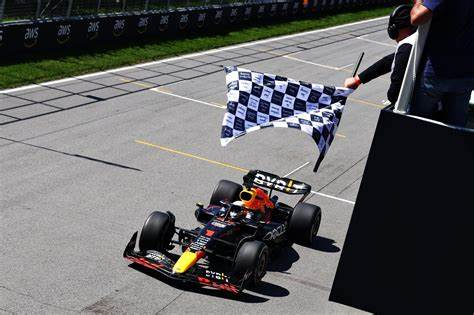

**Congratulations on completing the race. Kudos to you. Looking forward to meet you in next week.**